In [ ]:
import numpy as np 
import pandas as pd #上两次作业的老样子
import scipy.stats as stats #准备统计
import scipy
# import pymysql  # 

from datetime import datetime # 导入时间系数
import calendar
import statsmodels.formula.api as smf  


In [3]:
# 数据可视化与环境配置模块导入
from matplotlib import style  # 用于设置绘图风格
import matplotlib.pyplot as plt  # 核心绘图模块
import matplotlib.dates as mdates  # 时间序列绘图
import matplotlib.ticker as mtick  # 百分比绘图
import seaborn as sns  # 高级数据可视化模块

# 配置Jupyter：输出矢量图
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

# 配置Jupyter：显示所有代码块的运行结果
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# 配置pandas：列数不限制显示（便于查看全量数据）
import pandas as pd
pd.set_option('display.max_columns', None)



In [ ]:
data = pd.read_csv(r'C:\Users\冤种千斤\Desktop\代码\第三次作业\000001.csv')
data['Day'] = pd.to_datetime(data['Day'],format='%Y/%m/%d')
data.set_index('Day', inplace = True)
data.sort_values(by = ['Day'], ascending=True)#显示图表

,Preclose,Open,Highest,Lowest,Close
Day,,,,,
1990-12-19,,96.050,99.980,95.790,99.980
1990-12-20,99.98,104.300,104.390,99.980,104.390
1990-12-21,104.39,109.070,109.130,103.730,109.130
1990-12-24,109.13,113.570,114.550,109.130,114.550
1990-12-25,114.55,120.090,120.250,114.550,120.250
...,...,...,...,...,...
2025-08-25,3825.759,3848.163,3883.562,3839.972,3883.562
2025-08-26,3883.562,3871.471,3888.599,3859.758,3868.382
2025-08-27,3868.382,3869.612,3887.198,3800.350,3800.350


In [5]:
#要这个时间段的数据
data_new = data.loc['1995-01':'2024-07'].copy()

# 2. 批量将“收盘价”“前收盘价”转为数值类型
for col in ['Close', 'Preclose']:
    data_new[col] = pd.to_numeric(data_new[col], errors='coerce')

# 3. 计算上证指数日收益率：(当日收盘价 / 前一日收盘价) - 1
data_new['Raw_return'] = data_new['Close'] / data_new['Preclose'] - 1

# 4. 输出处理后的数据
data_new

,Preclose,Open,Highest,Lowest,Close,Raw_return
Day,,,,,,
1995-01-03,647.8700,637.7200,647.7100,630.5300,639.8800,-0.012333
1995-01-04,639.8800,641.9000,655.5100,638.8600,653.8100,0.021770
1995-01-05,653.8100,655.3800,657.5200,645.8100,646.8900,-0.010584
1995-01-06,646.8900,642.7500,643.8900,636.3300,640.7600,-0.009476
1995-01-09,640.7600,637.5200,637.5500,625.0400,626.0000,-0.023035
...,...,...,...,...,...,...
2024-07-25,2901.9518,2891.8918,2897.7674,2872.8497,2886.7416,-0.005241
2024-07-26,2886.7416,2885.9953,2899.1162,2875.3959,2890.8973,0.001440
2024-07-29,2890.8973,2889.4726,2898.9512,2878.5825,2891.8453,0.000328


In [7]:
Month_data = data_new.resample('M')['Raw_return'].apply(lambda x: np.prod(1+x)-1).to_frame(name='Ret')
Month_data#计算月收益率

,Ret
Day,
1995-01-31,-0.131631
1995-02-28,-0.023694
1995-03-31,0.177803
1995-04-30,-0.103552
1995-05-31,0.207922
...,...
2024-03-31,0.008622
2024-04-30,0.020932
2024-05-31,-0.005801


In [ ]:
Quarter_data = data_new.resample('Q')['Raw_return'].apply(lambda x: np.prod(1+x)-1).to_frame(name='Ret')
Quarter_data#计算季度收益

,Ret
Day,
1995-03-31,-0.001466
1995-06-30,-0.025258
1995-09-30,0.145660
1995-12-31,-0.231358
1996-03-31,0.001981
...,...
2023-09-30,-0.028603
2023-12-31,-0.043575
2024-03-31,0.022263


In [10]:
Year_data = data_new.resample('Y')['Raw_return'].apply(lambda x: np.prod(1+x)-1).to_frame(name='Ret')
Year_data#计算年度收益率

,Ret
Day,
1995-12-31,-0.142899
1996-12-31,0.651425
1997-12-31,0.302153
1998-12-31,-0.039695
1999-12-31,0.191750
2000-12-31,0.517277
2001-12-31,-0.206180
2002-12-31,-0.175167
2003-12-31,0.102670


In [ ]:
import numpy as np

# 1. 提取时间维度辅助字段
Month_data['Year'] = Month_data.index.year
Month_data['Month'] = Month_data.index.month
Month_data['Month_name'] = Month_data.index.strftime('%b')  # 生成月份缩写（如Jan、Feb）
Month_data['Decade'] = (Month_data.index.year // 10) * 10  # 按10年划分年代（如1995→1990年代）

# 2. 定义函数：计算滚动12个月的几何年化收益率
def calc_geometric_ann_return(series):
    return (np.prod(1 + series) ** (12 / len(series))) - 1  # 复利年化逻辑

# 3. 计算滚动12个月年化收益率与波动率
Month_data['Rolling_ann_return'] = Month_data['Ret'].rolling(
    window=12, 
    min_periods=12
).apply(calc_geometric_ann_return)

Month_data['Rolling_ann_vol'] = Month_data['Ret'].rolling(
    window=12, 
    min_periods=12
).std() * np.sqrt(12)  # 波动率年化

Month_data

,Ret,Year,Month,Month_name,Decade,Rolling_ann_return,Rolling_ann_vol
Day,,,,,,,
1995-01-31,-0.131631,1995,1,Jan,1990,NaN,NaN
1995-02-28,-0.023694,1995,2,Feb,1990,NaN,NaN
1995-03-31,0.177803,1995,3,Mar,1990,NaN,NaN
1995-04-30,-0.103552,1995,4,Apr,1990,NaN,NaN
1995-05-31,0.207922,1995,5,May,1990,NaN,NaN
...,...,...,...,...,...,...,...
2024-03-31,0.008622,2024,3,Mar,2020,-0.070792,0.134004
2024-04-30,0.020932,2024,4,Apr,2020,-0.065733,0.135051
2024-05-31,-0.005801,2024,5,May,2020,-0.036745,0.130866


In [17]:
Month_data.index = pd.to_datetime(Month_data.index)

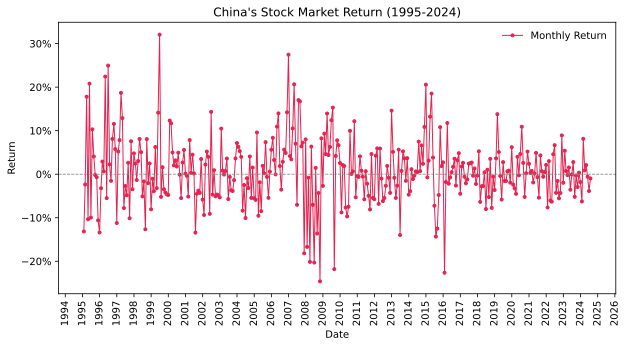

In [ ]:
# 画图
fig, ax = plt.subplots(figsize=(10, 5)) # 比例
ax.plot(
    'Ret',  # 使用正确的列名 Ret
    '.-',  # 线的类型
    color = "#E32350",  # 线的颜色 RGB
    label = 'Monthly Return',  # 更改为中文标签
    linewidth = 1,  # 线的粗细
    data = Month_data['1995-01-01':'2024-07-31'])  # 画图的数据
ax.set_title("China's Stock Market Return (1995-2024)") # 更简洁的标题
ax.set_xlabel('Date') # 将x轴名称改为中文
plt.ylabel('Return') # 将y轴名称改为中文

# 设置x轴的日期格式
date_format = mdates.DateFormatter('%Y') # 只显示年份
ax.xaxis.set_major_formatter(date_format) # 设置x轴的日期格式

# 设置x轴的刻度间隔
ax.xaxis.set_major_locator(mdates.YearLocator(1))  # 每1年显示一个刻度

# 添加百分比格式
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0)) # 将y轴设置为百分比格式

# 旋转x轴标签以防止重叠
plt.xticks(rotation=90) # 旋转x轴标签

# 添加图例
plt.legend(loc='upper right', frameon=False, fontsize=10) 

# 图例添加在具体的位置
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., frameon=False, fontsize=10)

# 添加水平参考线表示零收益
ax.axhline(y=0, color='gray', linestyle='--', linewidth=0.8)

# 保存图片
fig.savefig('Monthly_return.pdf', bbox_inches='tight')
plt.show();

In [29]:
help(plt.plot)#引出绘图函数

Help on function plot in module matplotlib.pyplot:

plot(*args, scalex=True, scaley=True, data=None, **kwargs)
    Plot y versus x as lines and/or markers.
    
    Call signatures::
    
        plot([x], y, [fmt], *, data=None, **kwargs)
        plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)
    
    The coordinates of the points or line nodes are given by *x*, *y*.
    
    The optional parameter *fmt* is a convenient way for defining basic
    formatting like color, marker and linestyle. It's a shortcut string
    notation described in the *Notes* section below.
    
    >>> plot(x, y)        # plot x and y using default line style and color
    >>> plot(x, y, 'bo')  # plot x and y using blue circle markers
    >>> plot(y)           # plot y using x as index array 0..N-1
    >>> plot(y, 'r+')     # ditto, but with red plusses
    
    You can use `.Line2D` properties as keyword arguments for more
    control on the appearance. Line properties and *fmt* can be mixed.
    The f

Text(0.5, 1.0, "China's Stock Market Quarterly Returns (1995-2024)")

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Return')

(array([ 8401.,  8766.,  9131.,  9496.,  9862., 10227., 10592., 10957.,
        11323., 11688., 12053., 12418., 12784., 13149., 13514., 13879.,
        14245., 14610., 14975., 15340., 15706., 16071., 16436., 16801.,
        17167., 17532., 17897., 18262., 18628., 18993., 19358., 19723.,
        20089., 20454.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

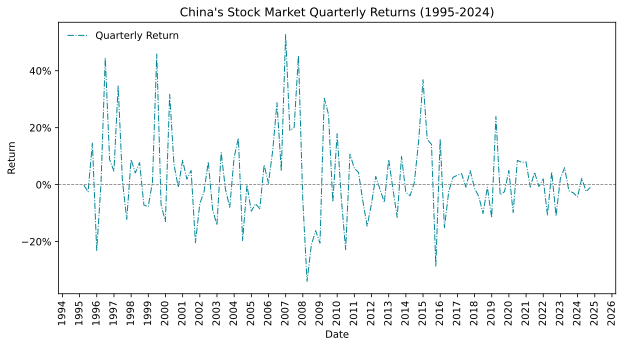

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mtick

# 1. 创建画布与子图
fig, ax = plt.subplots(figsize=(10, 5))

# 2. 绘制季度收益率曲线
ax.plot(
    Quarter_data.index,  # x轴：日期索引
    Quarter_data['Ret'],  # y轴：季度收益率
    linestyle='-.',
    color='#038798',  # 原RGB颜色对应十六进制值，确保显示一致
    label='Quarterly Return',
    linewidth=1
)

# 3. 配置标题与坐标轴标签
ax.set_title("China's Stock Market Quarterly Returns (1995-2024)")
ax.set_xlabel('Date')
ax.set_ylabel('Return')

# 4. 设置x轴日期格式（仅显示年份）与刻度间隔（每年一个刻度）
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.xaxis.set_major_locator(mdates.YearLocator(1))

# 5. 旋转x轴标签防止重叠
plt.xticks(rotation=90)

# 6. 设置y轴为百分比格式
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

# 7. 添加零收益参考线
ax.axhline(y=0, color='gray', linestyle='--', linewidth=0.8)

# 8. 添加图例
ax.legend(loc='upper left', frameon=False, fontsize=10)

# 9. 保存图形
fig.savefig('iQuarterly_return.pdf', bbox_inches='tight')

# 10. 显示图形
plt.show()

Text(0.5, 1.0, "China's Stock Market Annual Returns (1995-2024)")

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Return')

<BarContainer object of 1 artists>

<BarContainer object of 1 artists>

<BarContainer object of 1 artists>

<BarContainer object of 1 artists>

<BarContainer object of 1 artists>

<BarContainer object of 1 artists>

<BarContainer object of 1 artists>

<BarContainer object of 1 artists>

<BarContainer object of 1 artists>

<BarContainer object of 1 artists>

<BarContainer object of 1 artists>

<BarContainer object of 1 artists>

<BarContainer object of 1 artists>

<BarContainer object of 1 artists>

<BarContainer object of 1 artists>

<BarContainer object of 1 artists>

<BarContainer object of 1 artists>

<BarContainer object of 1 artists>

<BarContainer object of 1 artists>

<BarContainer object of 1 artists>

<BarContainer object of 1 artists>

<BarContainer object of 1 artists>

<BarContainer object of 1 artists>

<BarContainer object of 1 artists>

<BarContainer object of 1 artists>

<BarContainer object of 1 artists>

<BarContainer object of 1 artists>

<BarContainer object of 1 artists>

<BarContainer object of 1 artists>

<BarContainer object of 1 artists>

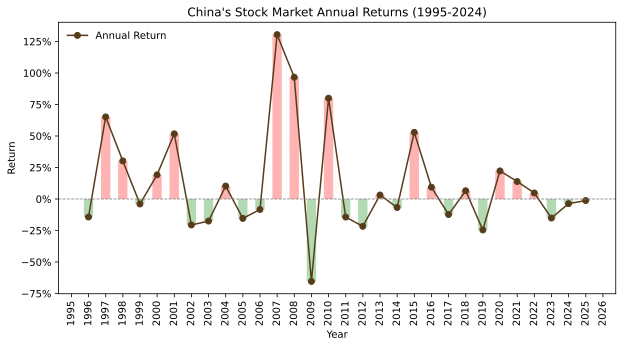

In [35]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mtick
# 假设Year_data是包含日期索引和Ret列的DataFrame
# 1. 创建画布与子图
fig, ax = plt.subplots(figsize=(10, 5))

# 2. 绘制年度收益率折线（橙色+圆点标记）
ax.plot(
    Year_data.index,        # x轴：日期索引
    Year_data['Ret'],       # y轴：年度收益率
    'o-',                   # 线型：圆点标记的折线
    color="#573C1B",        # 橙色（区分其他周期图表）
    label='Annual Return',  # 图例标签
    linewidth=1.5           # 线宽（突出年度数据）
)

# 3. 图表标题与坐标轴标签
ax.set_title("China's Stock Market Annual Returns (1995-2024)")
ax.set_xlabel('Year')
ax.set_ylabel('Return')

# 4. X轴日期格式（仅显示年份）与刻度间隔（每年1个刻度）
date_format = mdates.DateFormatter('%Y')
ax.xaxis.set_major_formatter(date_format)
ax.xaxis.set_major_locator(mdates.YearLocator(1))

# 5. 旋转X轴标签（防止重叠）
ax.tick_params(axis='x', rotation=90)

# 6. Y轴改为百分比格式
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

# 7. 零收益参考线（灰色虚线）
ax.axhline(y=0, color='gray', linestyle='--', linewidth=0.8)

# 8. 正负收益条件填充（正收益红色、负收益绿色）
for i, year in enumerate(Year_data.index):
    ret = Year_data['Ret'].iloc[i]
    ax.bar(
        year, ret,
        width=200,   # 柱状宽度（适配日期刻度）
        alpha=0.3,   # 透明度
        color='red' if ret >= 0 else 'green'
    )

# 9. 图例（左上角、无边框、小字号）
ax.legend(loc='upper left', frameon=False, fontsize=10)

# 10. 保存图片
fig.savefig('Yearly_return.pdf', bbox_inches='tight')

# 11. 显示图表
plt.show()

Text(0.5, 1.0, "China's Stock Market")

Text(0.5, 0, 'month')

Text(0, 0.5, 'Return')

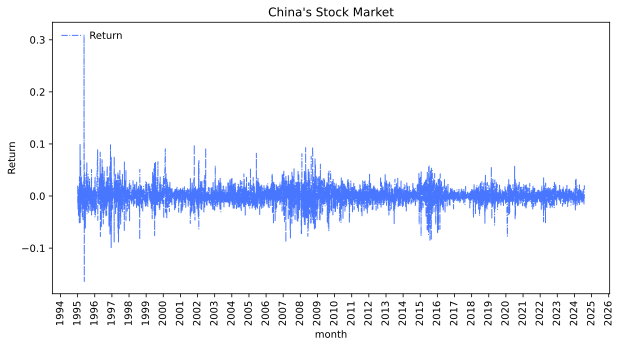

In [36]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mtick

# 1. 创建画布与子图
fig, ax = plt.subplots(figsize=(10, 5))

# 2. 绘制日收益率折线图
ax.plot(
    'Raw_return',
    linestyle='-.',
    color='#4876FF',  # 保持原RGB颜色
    label='Return',
    linewidth=1,
    data=data_new['1995-01-01':'2024-07-31']
)

# 3. 设置标题与坐标轴标签
ax.set_title("China's Stock Market")
ax.set_xlabel('month')
ax.set_ylabel('Return')

# 4. 配置x轴日期格式（显示年份）与刻度间隔
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.xaxis.set_major_locator(mdates.YearLocator())  # 每年一个刻度

# 5. 旋转x轴标签防止重叠
ax.tick_params(axis='x', rotation=90)

# 6. 添加图例
ax.legend(loc='upper left', frameon=False, fontsize=10)

# 7. 保存图片
fig.savefig('Daily_return.pdf', bbox_inches='tight')

# 8. 显示图形
plt.show()

In [ ]:
data_new['Cum_return'] = (1 + data_new['Raw_return']).cumprod() - 1#引出Cum_return列

通过累计决策判断收益风险等

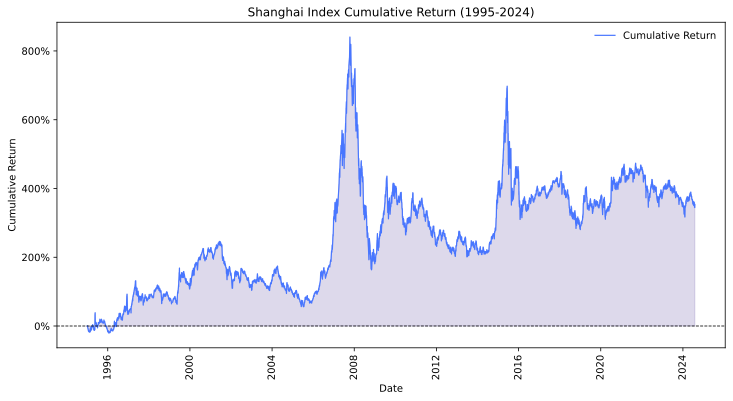

In [40]:
# Cumulative return of Shanghai Index (base=0)
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(data_new.index, data_new['Cum_return'], color='#4876FF', linewidth=1.2, label='Cumulative Return')
ax.fill_between(data_new.index, 0, data_new['Cum_return'], color="#1F037D", alpha=0.15)
ax.axhline(0, color='black', linewidth=0.8, linestyle='--')
ax.set_title('Shanghai Index Cumulative Return (1995-2024)')
ax.set_xlabel('Date')
ax.set_ylabel('Cumulative Return')
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.xticks(rotation=90)
plt.legend(frameon=False) # 图例不显示边框
fig.savefig('Cumulative_return.pdf', bbox_inches='tight')
plt.show();


最大回测


Text(0.5, 1.0, 'Shanghai Index Maximum Drawdown (1995-2024)')

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Drawdown')

(-7.107333261302469, 0.92)

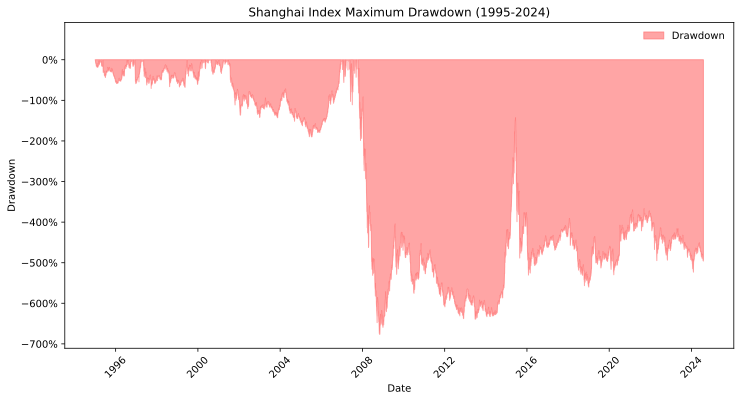

In [ ]:
# 计算历史最高点与回撤（核心业务逻辑，保持不变）
data_new['Peak'] = data_new['Cum_return'].cummax()  # 历史累积最高点
data_new['Drawdown'] = data_new['Cum_return'] - data_new['Peak']  # 回撤 = 累积收益 - 历史最高点

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# 绘制最大回撤曲线
fig, ax = plt.subplots(figsize=(12, 6))

# 填充回撤区域（回撤为负，在0轴以下填充）
ax.fill_between(
    data_new.index, 
    data_new['Drawdown'], 
    0, 
    color='#FF6A6A',  # 保持原颜色
    alpha=0.6, 
    label='Drawdown'
)

# 配置标题与坐标轴
ax.set_title('Shanghai Index Maximum Drawdown (1995-2024)')
ax.set_xlabel('Date')
ax.set_ylabel('Drawdown')

# Y轴格式：百分比显示
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

# Y轴范围：基于最大回撤的1.05倍和0.92倍，确保曲线完整显示
ax.set_ylim(data_new['Drawdown'].min() * 1.05, 0.92)

# X轴标签旋转45°，防止重叠
ax.tick_params(axis='x', rotation=45)

# 隐藏图例边框
ax.legend(frameon=False)

# 保存图片
fig.savefig('maximum_drawdown.pdf', bbox_inches='tight')

# 显示图形
plt.show()

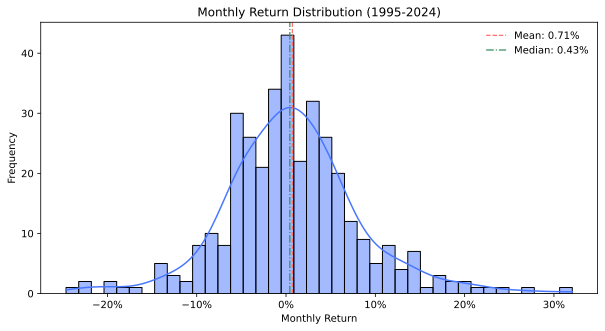

In [44]:
# 月度收益率分布：看集中度与尾部风险
fig, ax = plt.subplots(figsize=(10, 5))
sns.histplot(Month_data['Ret'].dropna(), bins=40, kde=True, color='#4876FF', ax=ax)
mean_return = Month_data['Ret'].mean()
median_return = Month_data['Ret'].median()
ax.axvline(mean_return, color='#FF6A6A', linestyle='--', linewidth=1.2, label=f"Mean: {mean_return:.2%}")
ax.axvline(median_return, color='#2E8B57', linestyle='-.', linewidth=1.2, label=f"Median: {median_return:.2%}")
ax.set_title("Monthly Return Distribution (1995-2024)")
ax.set_xlabel('Monthly Return')
ax.set_ylabel('Frequency')
ax.xaxis.set_major_formatter(mtick.PercentFormatter(1.0)) # x轴百分比格式
plt.legend(frameon=False)
fig.savefig('Monthly_return_distribution.pdf', bbox_inches='tight')
plt.show();


下面的代码输出的图形不符，查了说不支持legend参数

<AxesSubplot:xlabel='Month_name', ylabel='Ret'>

Text(0.5, 1.0, 'Monthly Return Distribution by Month (1995-2024)')

Text(0.5, 0, 'Month')

Text(0, 0.5, 'Monthly Return')

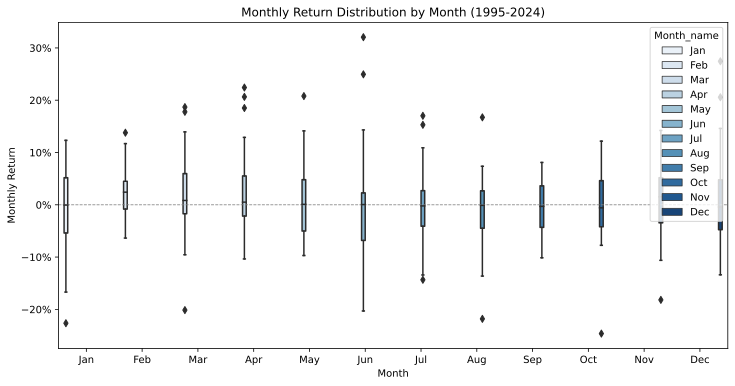

In [ ]:
import calendar
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# 设置月份显示顺序
month_order = list(calendar.month_abbr[1:])  # 生成Jan-Dec的月份缩写列表

# 创建画布
fig, ax = plt.subplots(figsize=(12, 6))

# 绘制月度收益箱线图
sns.boxplot(
    data=Month_data.dropna(subset=['Ret']), 
    x='Month_name',
    y='Ret',
    hue='Month_name',
    order=month_order,
    palette='Blues',  # 保持蓝色系渐变
    ax=ax
)

ax.set_title('Monthly Return Distribution by Month (1995-2024)')
ax.set_xlabel('Month')
ax.set_ylabel('Monthly Return')
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax.axhline(y=0, color='gray', linestyle='--', linewidth=0.8)
ax.tick_params(axis='x', rotation=0)
fig.savefig('Monthly_return_boxplot.pdf', bbox_inches='tight')
plt.show()


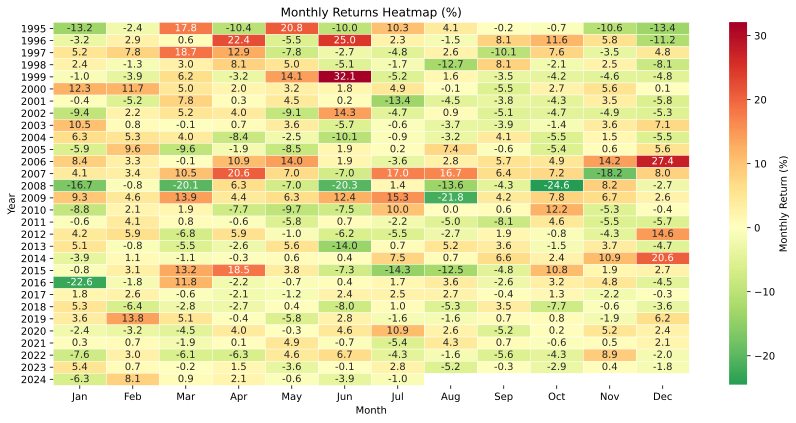

In [ ]:
# 创造一个热力图年月数据透视表
heatmap_data = Month_data.pivot_table(values='Ret', index='Year', columns='Month', aggfunc='first').sort_index()
heatmap_data.columns = [calendar.month_abbr[m] for m in heatmap_data.columns]

# 创造热力图
fig, ax = plt.subplots(figsize=(12, 6))
sns.heatmap(heatmap_data * 100, 
            cmap='RdYlGn_r',  # Red (negative) to Green (positive) colormap
            center=0,       # Center the colormap at zero
            linewidths=0.4, 
            linecolor='white',
            cbar_kws={'label': 'Monthly Return (%)'},
            annot=True,     # Show values in cells
            fmt='.1f',      # Format as 1 decimal place
            ax=ax)

ax.set_title('Monthly Returns Heatmap (%)')
ax.set_xlabel('Month')
ax.set_ylabel('Year')

plt.tight_layout()
fig.savefig('Monthly_heatmap.pdf', bbox_inches='tight')
plt.show();


<BarContainer object of 20 artists>

Text(0.5, 1.0, 'Monthly Return Autocorrelation Function')

Text(0.5, 0, 'Lag (months)')

Text(0, 0.5, 'Autocorrelation')

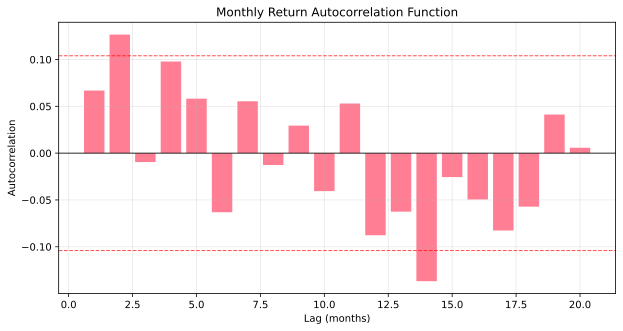

In [55]:
from statsmodels.tsa.stattools import acf
import numpy as np
import matplotlib.pyplot as plt#导入函数
# 提取并清洗月度收益数据（删除缺失值）
monthly_returns = Month_data['Ret'].dropna()
# 设置滞后阶数
lags = 20
autocorr = acf(monthly_returns, nlags=lags, fft=True)
autocorr_no_zero = autocorr[1:]
#  绘制自相关图 
fig, ax = plt.subplots(figsize=(10, 5))
# 绘制自相关系数柱状图
ax.bar(
    range(1, lags + 1),  # x轴：滞后月份（1~20）
    autocorr_no_zero,    # y轴：自相关系数
    alpha=0.7,           # 透明度
    color="#FF4866"      # 蓝色系填充
)

# 添加基准线与置信区间
ax.axhline(y=0, color='black', linewidth=0.8)  # 0自相关基准线

n = len(monthly_returns)
confidence = 1.96 / np.sqrt(n)
ax.axhline(y=confidence, color='red', linestyle='--', linewidth=1, alpha=0.7)   # 上置信限
ax.axhline(y=-confidence, color='red', linestyle='--', linewidth=1, alpha=0.7)  # 下置信限
# 图表标签与标题
ax.set_title('Monthly Return Autocorrelation Function')
ax.set_xlabel('Lag (months)')
ax.set_ylabel('Autocorrelation')
ax.grid(True, alpha=0.3)  # 浅色网格增强可读性
# 保存并显示图形
fig.savefig('Return_autocorrelation.pdf', bbox_inches='tight')  # 保存到指定路径
plt.show()  # 显示图形

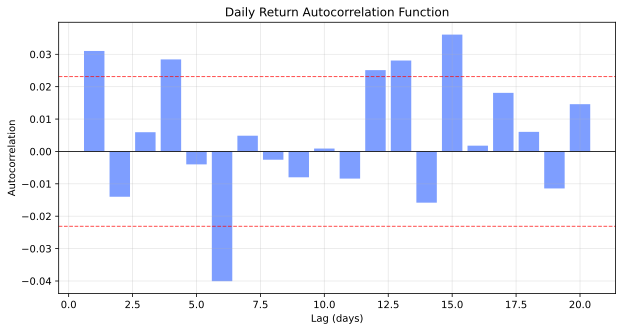

In [56]:
from statsmodels.tsa.stattools import acf

# 日数据的自相关的图

lags = 20
daily_autocorr = acf(data_new['Raw_return'].dropna(), nlags=lags, fft=True)

# 删除第一个数据点（lag=0，值为1）
daily_autocorr_no_zero = daily_autocorr[1:]

fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(range(1, lags+1), daily_autocorr_no_zero, alpha=0.7, color='#4876FF')
ax.axhline(y=0, color='black', linewidth=0.8)
ax.axhline(y=1.96/np.sqrt(len(data_new['Raw_return'].dropna())), color='red', linestyle='--', linewidth=1, alpha=0.7)
ax.axhline(y=-1.96/np.sqrt(len(data_new['Raw_return'].dropna())), color='red', linestyle='--', linewidth=1, alpha=0.7)
ax.set_title('Daily Return Autocorrelation Function')
ax.set_xlabel('Lag (days)')
ax.set_ylabel('Autocorrelation')   
ax.grid(True, alpha=0.3) # 使网格线更淡一些
fig.savefig('Daily_return_autocorrelation.pdf', bbox_inches='tight')
plt.show();

(array([4., 4., 2., 6., 9., 6., 5., 5., 4., 5., 2., 1., 1., 1., 1., 2., 1.,
        0., 0., 1.]),
 array([-0.13390211, -0.11117909, -0.08845606, -0.06573303, -0.04301001,
        -0.02028698,  0.00243605,  0.02515907,  0.0478821 ,  0.07060513,
         0.09332815,  0.11605118,  0.13877421,  0.16149723,  0.18422026,
         0.20694329,  0.22966631,  0.25238934,  0.27511236,  0.29783539,
         0.32055842]),
 <BarContainer object of 20 artists>)

Text(0.5, 1.0, '1990s Monthly Returns')

Text(0.5, 0, 'Monthly Return')

Text(0, 0.5, 'Frequency')

(array([ 1.,  3.,  1.,  1.,  2.,  4.,  4., 17.,  8., 16., 18., 18., 10.,
         6.,  6.,  3.,  0.,  1.,  0.,  1.]),
 array([-0.24631394, -0.22027504, -0.19423613, -0.16819722, -0.14215831,
        -0.1161194 , -0.09008049, -0.06404159, -0.03800268, -0.01196377,
         0.01407514,  0.04011405,  0.06615296,  0.09219186,  0.11823077,
         0.14426968,  0.17030859,  0.1963475 ,  0.22238641,  0.24842532,
         0.27446422]),
 <BarContainer object of 20 artists>)

Text(0.5, 1.0, '2000s Monthly Returns')

Text(0.5, 0, 'Monthly Return')

Text(0, 0.5, 'Frequency')

(array([ 1.,  0.,  0.,  1.,  2.,  1.,  5., 11.,  9., 16., 27., 17., 14.,
         6.,  0.,  4.,  3.,  1.,  0.,  2.]),
 array([-0.22648749, -0.20487849, -0.18326949, -0.1616605 , -0.1400515 ,
        -0.1184425 , -0.0968335 , -0.0752245 , -0.0536155 , -0.03200651,
        -0.01039751,  0.01121149,  0.03282049,  0.05442949,  0.07603849,
         0.09764748,  0.11925648,  0.14086548,  0.16247448,  0.18408348,
         0.20569248]),
 <BarContainer object of 20 artists>)

Text(0.5, 1.0, '2010s Monthly Returns')

Text(0.5, 0, 'Monthly Return')

Text(0, 0.5, 'Frequency')

(array([1., 3., 4., 3., 3., 2., 4., 6., 8., 4., 3., 3., 2., 4., 1., 1., 0.,
        2., 0., 1.]),
 array([-0.07647165, -0.06719789, -0.05792412, -0.04865036, -0.03937659,
        -0.03010282, -0.02082906, -0.01155529, -0.00228152,  0.00699224,
         0.01626601,  0.02553978,  0.03481354,  0.04408731,  0.05336108,
         0.06263484,  0.07190861,  0.08118238,  0.09045614,  0.09972991,
         0.10900368]),
 <BarContainer object of 20 artists>)

Text(0.5, 1.0, '2020s Monthly Returns')

Text(0.5, 0, 'Monthly Return')

Text(0, 0.5, 'Frequency')

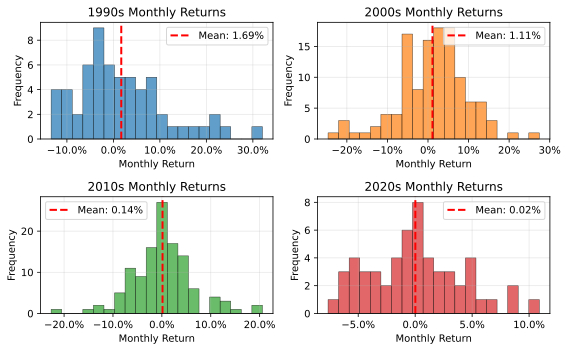

In [57]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import pandas as pd
# 1. 创建子图网格（2行2列，设置图形尺寸）
fig, axes = plt.subplots(2, 2, figsize=(8, 5))
axes = axes.flatten()  # 展平为一维数组，方便循环遍历
# 2. 提取并整理年代列表（去重、排序、过滤空值）
decades = Month_data['Decade'].unique()
decades = sorted([d for d in decades if not pd.isna(d)])
# 3. 循环绘制各年代月度收益直方图
for i, decade in enumerate(decades):
    # 筛选当前年代的月度收益数据（删除缺失值）
    decade_data = Month_data[Month_data['Decade'] == decade]['Ret'].dropna()
    # 绘制直方图
    axes[i].hist(
        decade_data, 
        bins=20, 
        alpha=0.7, 
        color=f'C{i}',  # 循环使用默认颜色区分年代
        edgecolor='black', 
        linewidth=0.5
    )
    # 添加均值参考线
    mean = decade_data.mean()
    axes[i].axvline(
        mean, 
        color='red', 
        linestyle='--', 
        linewidth=2, 
        label=f'Mean: {mean:.2%}'
    )
    # 配置标题与坐标轴
    axes[i].set_title(f'{int(decade)}s Monthly Returns')
    axes[i].set_xlabel('Monthly Return')
    axes[i].set_ylabel('Frequency')
    # X轴格式：百分比显示
    axes[i].xaxis.set_major_formatter(mtick.PercentFormatter(1.0))
    # 显示图例
    axes[i].legend()
    # 添加网格（增强可读性）
    axes[i].grid(True, alpha=0.3)
# 4. 调整布局并保存/显示图形
plt.tight_layout()
fig.savefig('Decades_return_distribution.pdf', bbox_inches='tight')
plt.show()